In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm

import copy 

In [3]:
# sns.set () #setting the default seaborn style for our plots 

# Read the data into the notebook 

In [4]:
df = pd.read_csv ('insurance.csv') #read the data as data frame 

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

# Basic EDA 

In [11]:
df.shape

(1338, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The data has 1338 instances with 7 attributes.

# checking for missing values 

In [13]:
df.isna().apply(pd.value_counts) #null value chack 

,age,sex,bmi,children,smoker,region,expenses
False,1338,1338,1338,1338,1338,1338,1338


In [14]:
df.isna().any().sum()

0

- There are no null values in any of the column

In [15]:
df.describe().T #five point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


- Distribution of 'bmi','age' and 'charges' columns.

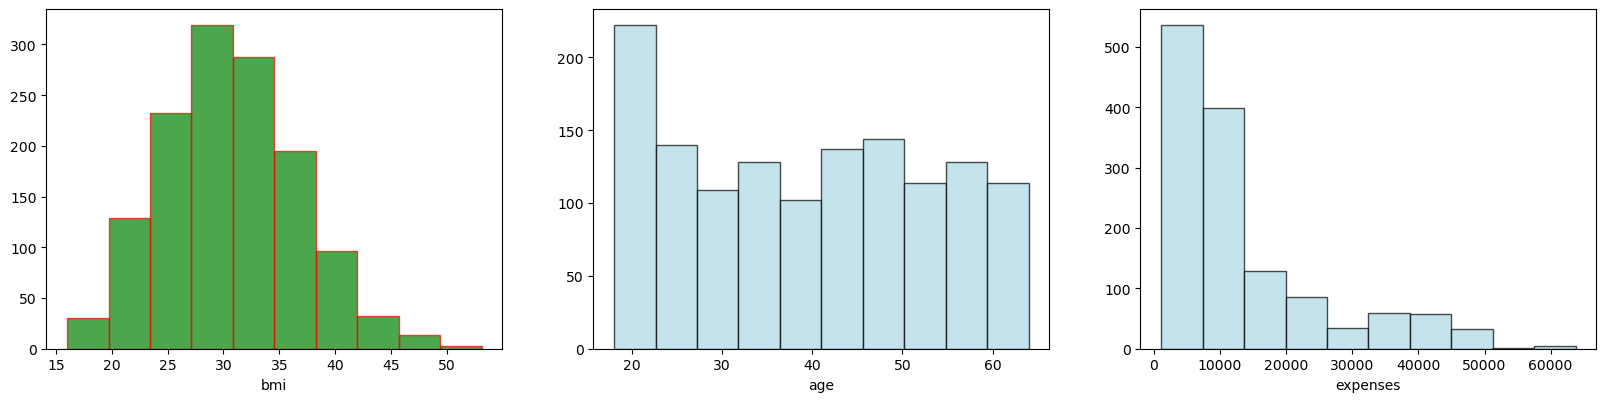

In [22]:
#Plots to see the distribution of the continuous features individually 

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='green' , edgecolor = 'red' , alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue' , edgecolor = 'black' , alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.expenses, color='lightblue' , edgecolor = 'black' , alpha = 0.7)
plt.xlabel('expenses')

plt.show()

- Measure of skewness of 'bmi', 'age' and 'charges' columns

In [27]:
import pandas as pd
from scipy import stats

In [28]:
# Calculate skewness
Skewness = pd.DataFrame({'Skewness': [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.expenses)]},
                        index=['bmi', 'age', 'expenses'])
print(Skewness)

          Skewness
bmi       0.284274
age       0.055610
expenses  1.514180


- CHECKING THE PRESENCE OF OUTLIERS IN 'bmi', 'age' and charges columns 

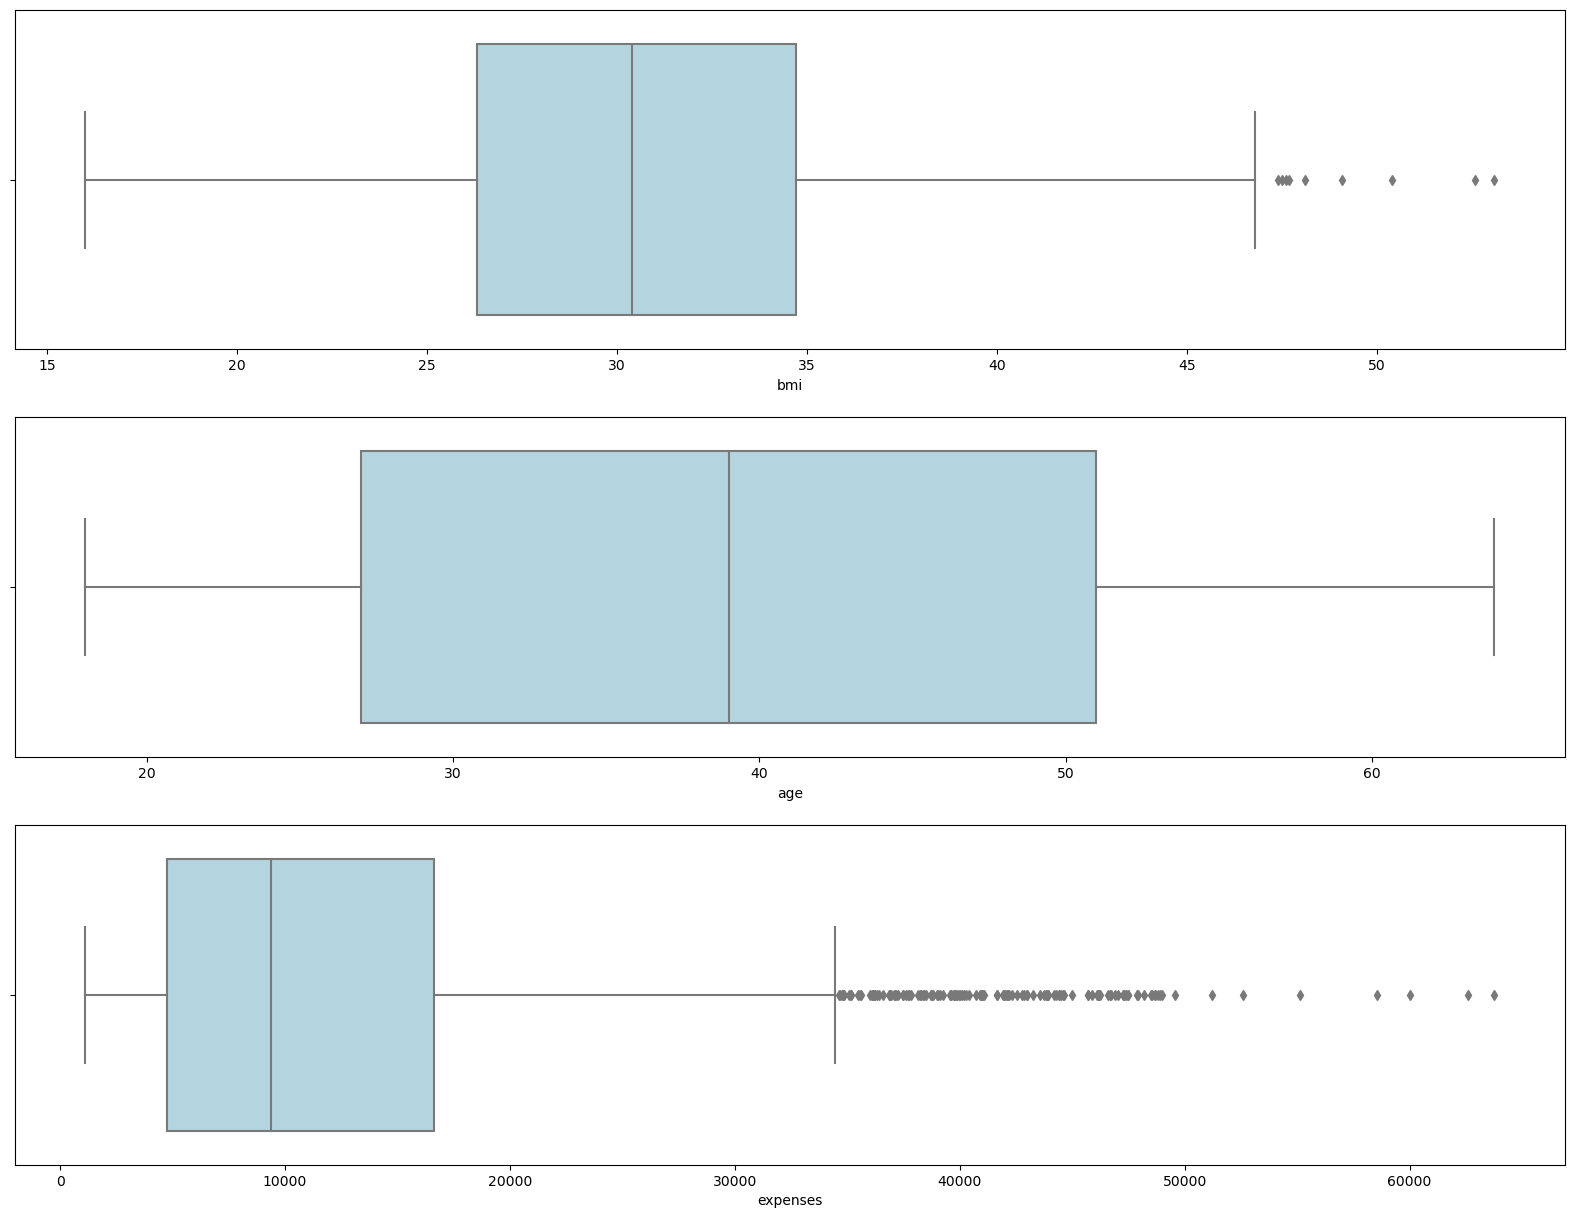

In [31]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color = 'lightblue')

plt.subplot(3,1,2)
sns.boxplot(x = df.age, color= 'lightblue')

plt.subplot(3,1,3)
sns.boxplot(x = df.expenses, color='lightblue')

plt.show()

- Distribution of categorical columns (include children)

In [32]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

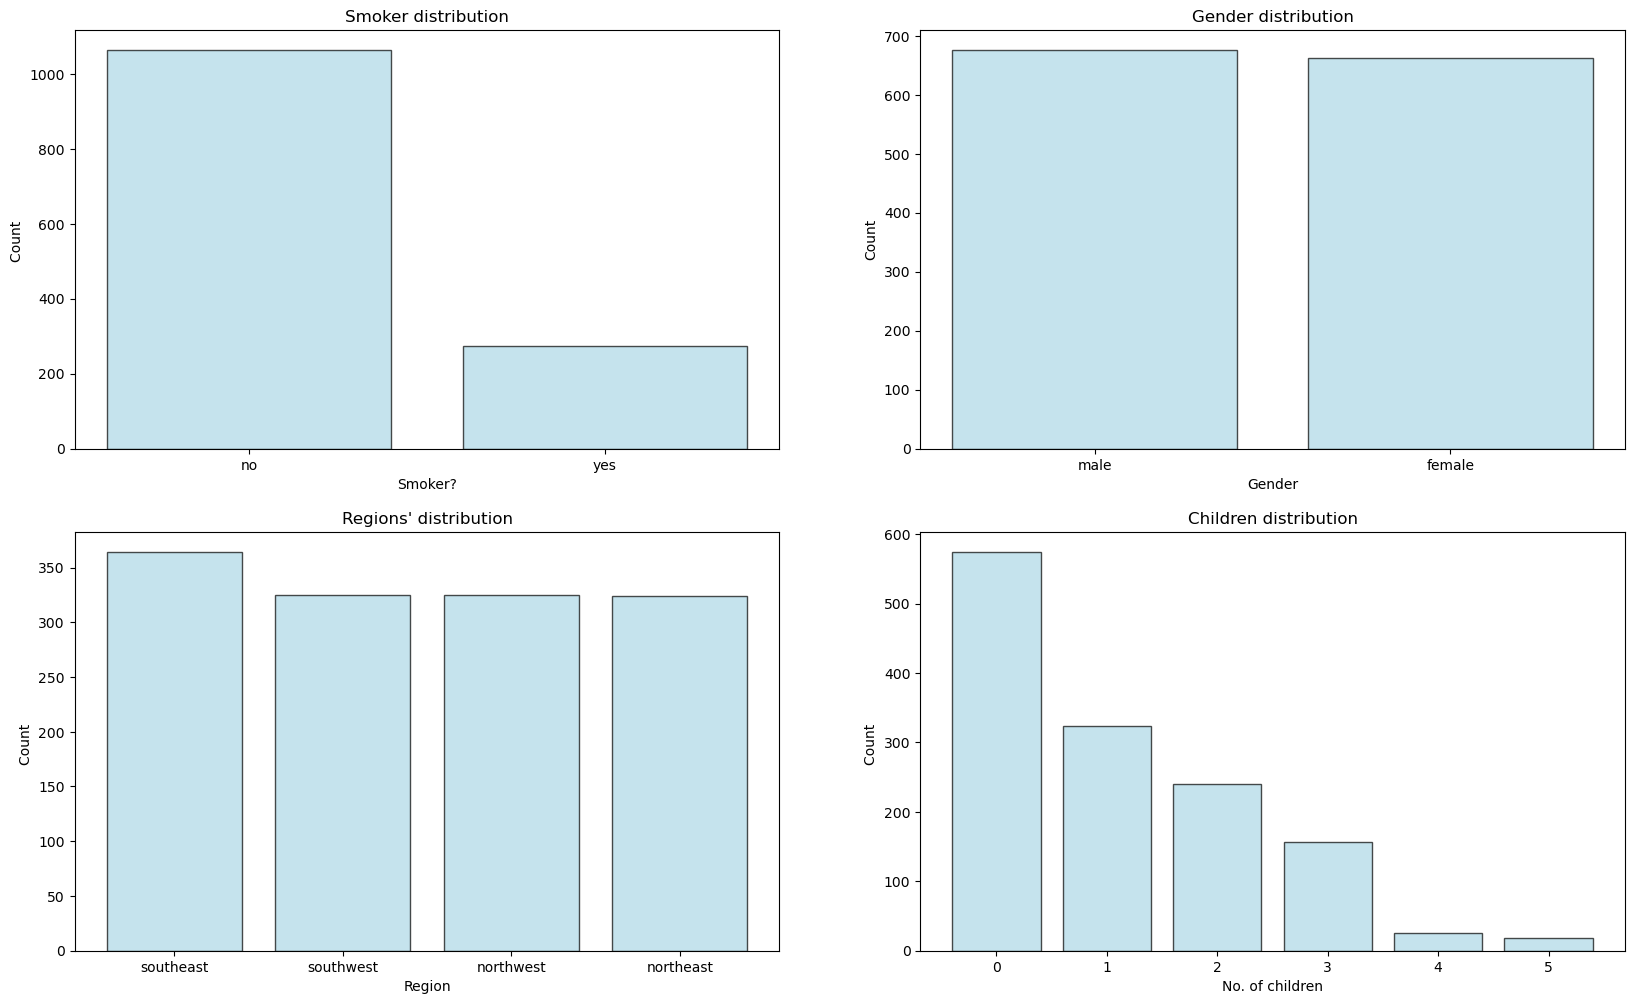

In [33]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

- pair plot that includes all the columns of the data frame 

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

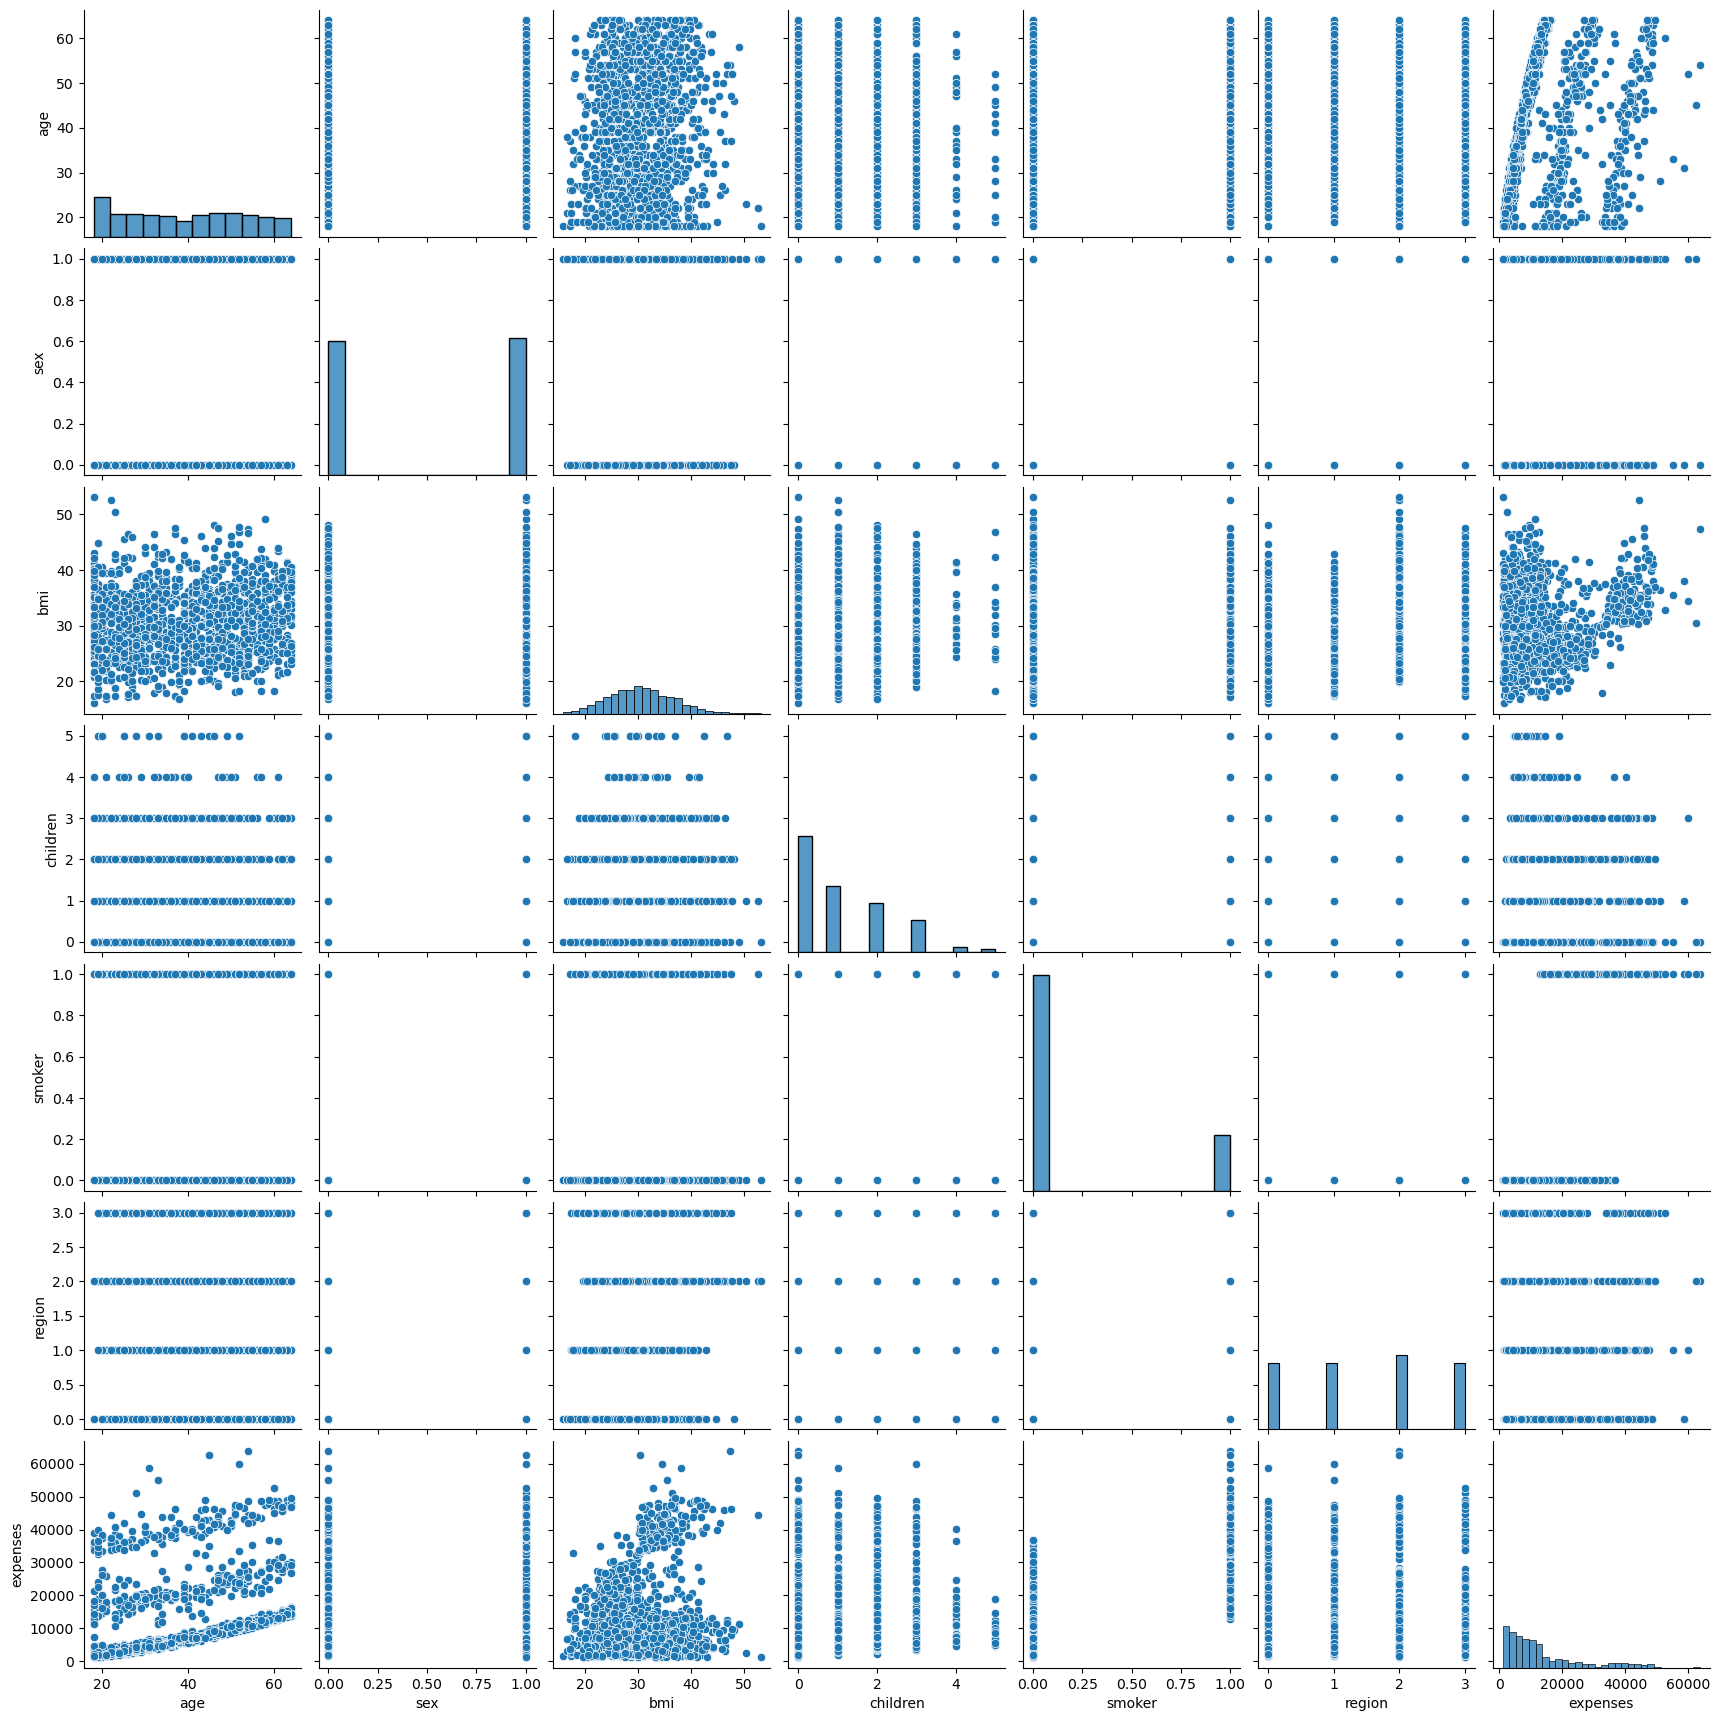

In [38]:
#label encooding the variable befor doing a pairplot ingores strings
from sklearn.preprocessing import LabelEncoder

df_encoded = copy.deepcopy(df)
df_encoded.loc[:, ['sex', 'smoker' , 'region']] = df_encoded.loc[:,['sex', 'smoker','region']].apply(LabelEncoder().fit_transform)

sns.pairplot(df_encoded) #pairplot
plt.show()

In [42]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [46]:
df_encoded

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


# Hypothesis Testing 

In [47]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\zakas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


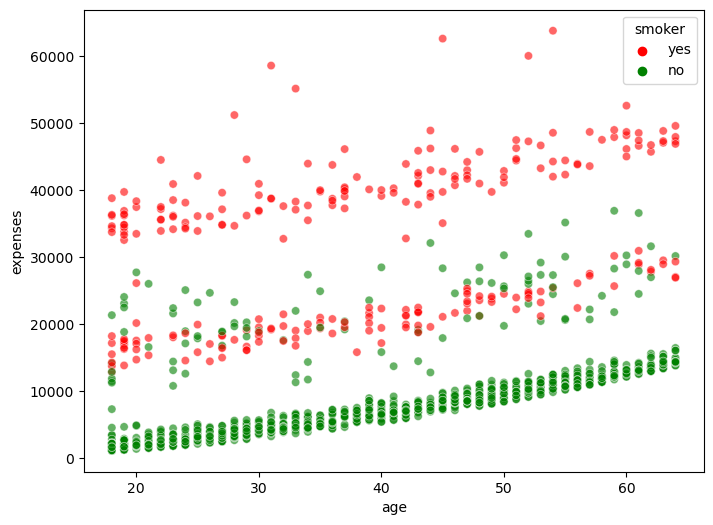

In [50]:
# scatter plot to look for visual evidence of dependecy between attributes smoker and charges accros different 
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.expenses, hue = df.smoker, palette = ['red', 'green'],alpha = 0.6)
plt.show()

- Visually the difference between charges of smokers and charges of non-smokers is apparent

In [51]:
# T-test to check dependency of smoking on charges
Ho = "expenses of smoker and non-smoker are same "   # Stating the Null Hypothesis
Ha = "expenses of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].expenses)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].expenses) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

expenses of smoker and non-smoker are not the same as the p_value (8.271449574495316e-283) < 0.05


- Does bmi of males differ significantly from that of females?

In [52]:
df.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

C:\Users\zakas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


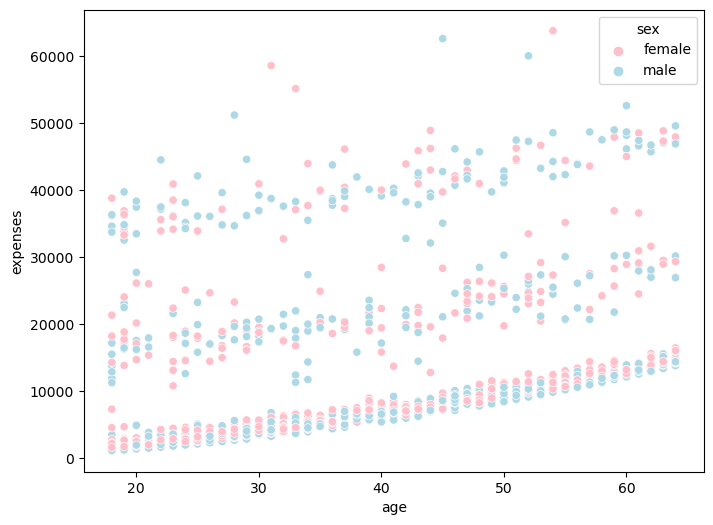

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.expenses,hue=df.sex,palette= ['pink','lightblue'] )
plt.show()

- Is the proportion of smokers significantly different in different genders?

In [55]:

# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


- Is the distribution of bmi across women with no children, one child and two children, the same ?

In [57]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.715) > 0.05


In [58]:
print("\U0001F600") # prints a happy face emoji

😀


# FINALLY 